# **Google playstore Data**
**Complete Exploratory Data Analysis**

## About Dataset

>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
While there are many public datasets available for Apple App Store data on platforms like Kaggle, there are not as many datasets for Google Play Store apps. After some research, I discovered that the iTunes App Store has a well-organized structure for easy web scraping. In contrast, the Google Play Store uses advanced techniques, such as dynamic page loading with JQuery, making scraping more difficult.

- `Content`
Each app (row) includes information such as category, rating, size, and more.

- `Acknowledgements`
This data is collected from the Google Play Store. Without this scraping, this app information would not be accessible.

- `Inspiration`
Data from Play Store apps has great potential to help app developers succeed. Valuable insights can be gained to assist developers in tapping into the Android market!

# **Problem Statement** # 
The Google Play Store hosts millions of apps across a wide range of categories. For developers, marketers, and decision-makers, it's crucial to understand:

- What makes an app popular?

- How do users interact with apps in different categories?

- Do factors like install count, price, or type (free vs paid) affect user ratings or reviews?

- Are there patterns or trends that developers can use to optimize their app's performance?

In this analysis, we aim to explore these questions through data-driven insights that help identify:

- The most populated and popular app categories.

- Relationships between installs, reviews, and ratings.

- User preferences for free vs paid apps.

This project does not aim to predict or build a model, but rather to explore and extract meaningful patterns from the available data.

# 1. Importing Libraries 

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 2. Data Loading and Exploration | Cleaning

- loading the data

In [36]:
df = pd.read_csv("googleplaystore.csv")

- Viewing the first five Rows of the data

In [37]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- Important things to know

In [38]:
# set option to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [39]:
print('The names of columns are:')
df.columns

The names of columns are:


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- Observing the dataset, it was found that one column's structure was not correct, leading to the deletion of that row.

In [40]:
# Finding the index of the row to delete
index_to_delete = df[df['Category'] == '1.9'].index
# Deleting the row using drop() with inplace=True
df.drop(index_to_delete, inplace=True)

- The row with Category value 1.9 was deleted because it had an incorrect structure that could affect data analysis.

In [41]:
print('The number of rows are', df.shape[0])
print('The number of columns are', df.shape[1])


The number of rows are 10840
The number of columns are 13


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


# **Observations**
---
1. There are 10840 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'` 

In [43]:
df.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


## Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let's clean the `Size` column first

In [44]:
df['Size'].isnull().sum()

0

- No null values, we are good to go.

In [45]:
# check unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

-  There are several uniques values in the `Size` column, we have to first make the unit into one common unit from M and K to bytes, and then remove the `M` and `K` from the values and convert them into numeric data type.

Verify the number of values and 3 different kind of values

In [46]:
# finding values having M in them
df['Size'].loc[df['Size'].str.contains('M')].count()

8829

In [47]:
# finding values having k in them
df['Size'].loc[df['Size'].str.contains('k')].count()

316

In [48]:
# finding values having Varies with device
df['Size'].loc[df['Size'].str.contains("Varies with device")].count()

1695

In [49]:
# convert the whole size column into bytes

# lets define a function
def convert_size(size):
    if size.endswith('M'):
        return float(size.replace('M', '')) * 1024 * 1024
    elif size.endswith('k'):
        return float(size.replace('k', '')) * 1024
    elif size.endswith('device'):
        return np.nan
    return size

In [50]:
# lets apply this function
df['Size'] = df['Size'].apply(convert_size)

In [51]:
df.rename(columns={'Size':'size_in_bytes'}, inplace=True)

In [52]:
df['size_in_mbs'] = df['size_in_bytes'] / (1024 * 1024)

- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the `Installs` column

In [53]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [54]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

### Steps to deal with Installs
- Remove + sign
- Remove comma ( , )
- Convert the column into an integer

In [55]:
df['Installs'].loc[df['Installs'].str.contains("\+")].count()

10839

In [56]:
df['Installs'] = df['Installs'].str.replace('+', '')

In [57]:
df['Installs'] = df['Installs'].str.replace(',','')

In [58]:
df['Installs'] = df['Installs'].astype('int')

In [59]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [95]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['Zero Installs', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Install_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [61]:
df['Install_category'].value_counts()

Install_category
Low                   2161
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

- Let's have a look on the `Price` column

In [62]:
df['Price'].value_counts()

Price
0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [63]:
df['Price'].isnull().sum()

0

In [64]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [65]:
# first we will se how many values have $ sign
df['Price'].loc[df['Price'].str.contains('\$')].count()

800

In [66]:
df['Price'] = df['Price'].str.replace('$','')

In [67]:
# now we are converting this column to float
df['Price'] = df['Price'].astype('float')

In [68]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.027368081180812 $


### **2.1. Descriptive Statistics**

In [69]:
df.describe()

,Rating,size_in_bytes,Installs,Price,size_in_mbs
count,9366.000000,9.145000e+03,1.084000e+04,10840.000000,9145.000000
mean,4.191757,2.256133e+07,1.546434e+07,1.027368,21.516165
std,0.515219,2.368637e+07,8.502936e+07,15.949703,22.589084
min,1.000000,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,1.048576e+08,1.000000e+09,400.000000,100.000000


## Observations:
---
- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `4.19` which is a good rating. On an average people give this rating.
- We can see that the `Reviews` column has a minimum value of `0` and a maximum value of `78,158,306` 78+ Millions, which is the range of reviews, and the mean is `444,111.93` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset.
---

## **2.2. Dealing with the missing values inside the dataset**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

In [70]:
df.isnull().sum()

App                    0
Category               0
Rating              1474
Reviews                0
size_in_bytes       1695
Installs               0
Type                   1
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            8
Android Ver            2
size_in_mbs         1695
Install_category       0
dtype: int64

In [71]:
# missing values percentage
perc = df.isnull().sum()/len(df) * 100
round(perc, 2).sort_values(ascending=False)

size_in_bytes       15.64
size_in_mbs         15.64
Rating              13.60
Current Ver          0.07
Android Ver          0.02
Type                 0.01
App                  0.00
Category             0.00
Reviews              0.00
Installs             0.00
Price                0.00
Content Rating       0.00
Genres               0.00
Last Updated         0.00
Install_category     0.00
dtype: float64

<Axes: >

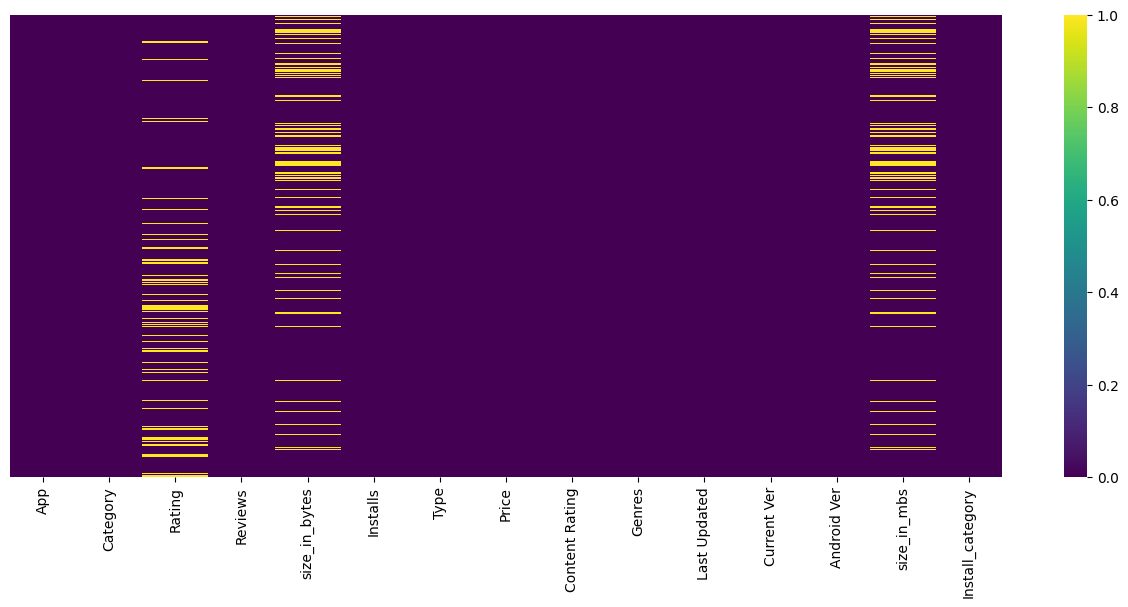

In [72]:
# plot missing values
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels=False ,cmap='viridis')

In [73]:
df.isnull().sum().sort_values(ascending=False)

size_in_bytes       1695
size_in_mbs         1695
Rating              1474
Current Ver            8
Android Ver            2
Type                   1
App                    0
Category               0
Reviews                0
Installs               0
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Install_category       0
dtype: int64

## Observations:
---
- We have 1695 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Type` column, which is 0.009% of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `correlation test`.
---

In [74]:
df.describe()

,Rating,size_in_bytes,Installs,Price,size_in_mbs
count,9366.000000,9.145000e+03,1.084000e+04,10840.000000,9145.000000
mean,4.191757,2.256133e+07,1.546434e+07,1.027368,21.516165
std,0.515219,2.368637e+07,8.502936e+07,15.949703,22.589084
min,1.000000,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,1.048576e+08,1.000000e+09,400.000000,100.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   App               10840 non-null  object  
 1   Category          10840 non-null  object  
 2   Rating            9366 non-null   float64 
 3   Reviews           10840 non-null  object  
 4   size_in_bytes     9145 non-null   float64 
 5   Installs          10840 non-null  int32   
 6   Type              10839 non-null  object  
 7   Price             10840 non-null  float64 
 8   Content Rating    10840 non-null  object  
 9   Genres            10840 non-null  object  
 10  Last Updated      10840 non-null  object  
 11  Current Ver       10832 non-null  object  
 12  Android Ver       10838 non-null  object  
 13  size_in_mbs       9145 non-null   float64 
 14  Install_category  10840 non-null  category
dtypes: category(1), float64(4), int32(1), object(9)
memory usage: 1.2+ MB


<Axes: >

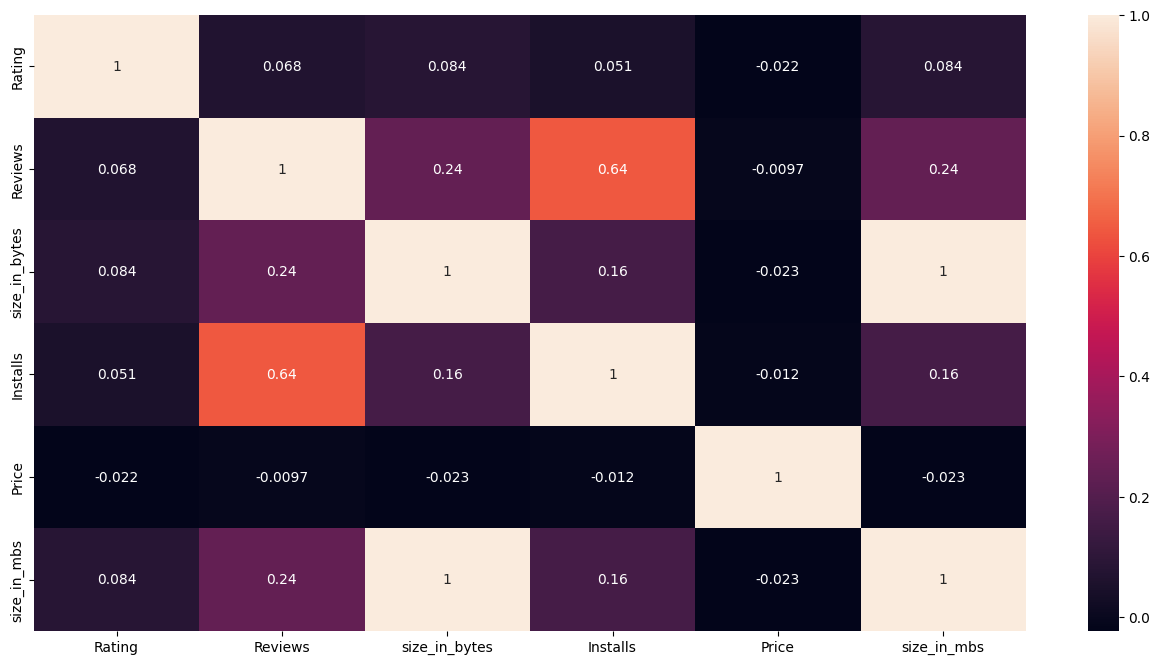

In [76]:
plt.figure(figsize=(16, 8))
num_col = ['Rating', 'Reviews', 'size_in_bytes', 'Installs', 'Price', 'size_in_mbs']
sns.heatmap(df[num_col].corr(), annot=True)

In [77]:
# we can also calculate the correlation matrix using pandas
df[num_col].corr()

,Rating,Reviews,size_in_bytes,Installs,Price,size_in_mbs
Rating,1.000000,0.068141,0.083737,0.051355,-0.021903,0.083737
Reviews,0.068141,1.000000,0.238214,0.643122,-0.009667,0.238214
size_in_bytes,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000
Installs,0.051355,0.643122,0.164787,1.000000,-0.011689,0.164787
Price,-0.021903,-0.009667,-0.023007,-0.011689,1.000000,-0.023007
size_in_mbs,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000


- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, and `Type` columns, as they are very less in number and will not affect our analysis.

In [78]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10840


In [79]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Type', 'Current Ver', 'Android Ver'], inplace=True)

In [80]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10829


- We have removed `11` rows having null values in the `Current Ver`, `Android Ver`, and `Type` columns.

---
## **Observations**
- Only `Rating` and `Size_in_bytes` or `Size_in_Mb` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

### **Filling missing values of Rating, with respect to the average give in each 'Installs Category'!**

In [96]:
# check which have 'Zero Installs' values in install_catgory
df['Install_category'].loc[df['Install_category'] == 'Zero Installs'].head(10)

4465    Zero Installs
5307    Zero Installs
5486    Zero Installs
5945    Zero Installs
6692    Zero Installs
7434    Zero Installs
8081    Zero Installs
8614    Zero Installs
8871    Zero Installs
9337    Zero Installs
Name: Install_category, dtype: category
Categories (8, object): ['Zero Installs' < 'Very low' < 'Low' < 'Moderate' < 'More than moderate' < 'High' < 'Very High' < 'Top Notch']

In [81]:
df.groupby('Install_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Install_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [94]:
df['Install_category'].value_counts()

Install_category
Low                   2129
High                  2003
Very High             1815
More than moderate    1602
Moderate              1499
Top Notch              751
Very low               533
no                      14
Name: count, dtype: int64

In [82]:
mean_ratings = df.groupby('Install_category')['Rating'].transform('mean')
df['Rating'] = df['Rating'].fillna(mean_ratings)

In [83]:
df['Rating'].isnull().sum()

14

- All the values in the "Zero Installs" column were NaN, which is why the mean could not be calculated, and they remained NaN.

In [84]:
# replacing NaN values with zero 
df['Rating'] = df['Rating'].fillna(0)

## 2.3. **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


In [85]:
df.duplicated().sum()

483

- Remove Duplicates

In [86]:
df.drop_duplicates(inplace=True)

In [87]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

---

## **3. Insights from Data**

## **3.1. Which category has the highest number of apps?**

In [88]:
df['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

# **3.2. Which category has the highest number of installs?**

In [89]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

# **3.3. Which category has the highest number of reviews?**

In [90]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
PARENTING              8617941763614343114133936378967107559497632484...
SOCIAL                 7815830666577313860625949173295532622492170147...
MAPS_AND_NAVIGATION    7232629156815348110480050459432695644349284201...
EDUCATION              6289924181893254485375314299776977032346407510...
COMMUNICATION          5664284769119316125257964299514290354604324341...
ENTERTAINMENT          5456208116562894829677147008910939985095241225...
SPORTS                 5211381802283662828824597951338259119951733342...
FAMILY                 4706944214544499101477412753339832026757611161...
GAME                   4447388277222642242667725425814889736920352341...
HEALTH_AND_FITNESS     4281561577380983113927233722012540059220098117...
Name: Reviews, dtype: object

# **3.4. Which category has the highest average rating?**

In [99]:
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10).reset_index()
avg_rating

,Category,Rating
0,EVENTS,4.394346
1,EDUCATION,4.373794
2,BOOKS_AND_REFERENCE,4.358435
3,PERSONALIZATION,4.322099
4,ART_AND_DESIGN,4.298885
5,GAME,4.281926
6,HEALTH_AND_FITNESS,4.273890
7,PARENTING,4.259759
8,SHOPPING,4.253376
9,SPORTS,4.253041


# **3.5. How do average ratings compare between Free and Paid apps?**

In [100]:
import plotly.express as px

# Group by Type and calculate average rating
rating_by_type = df.groupby('Type')['Rating'].mean().reset_index()

# Plot Pie Chart
fig = px.pie(rating_by_type, 
             names='Type', 
             values='Rating', 
             title='Average Rating: Free vs Paid Apps',
             color_discrete_sequence=px.colors.sequential.Teal)

fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()


# **3.6. Free vs Paid Apps: Percentage Breakdown**

In [101]:
(df['Type'].value_counts() / len(df)) * 100

Type
Free    92.634835
Paid     7.365165
Name: count, dtype: float64

# **3.7. Relationships between Installs, Reviews, and Ratings**

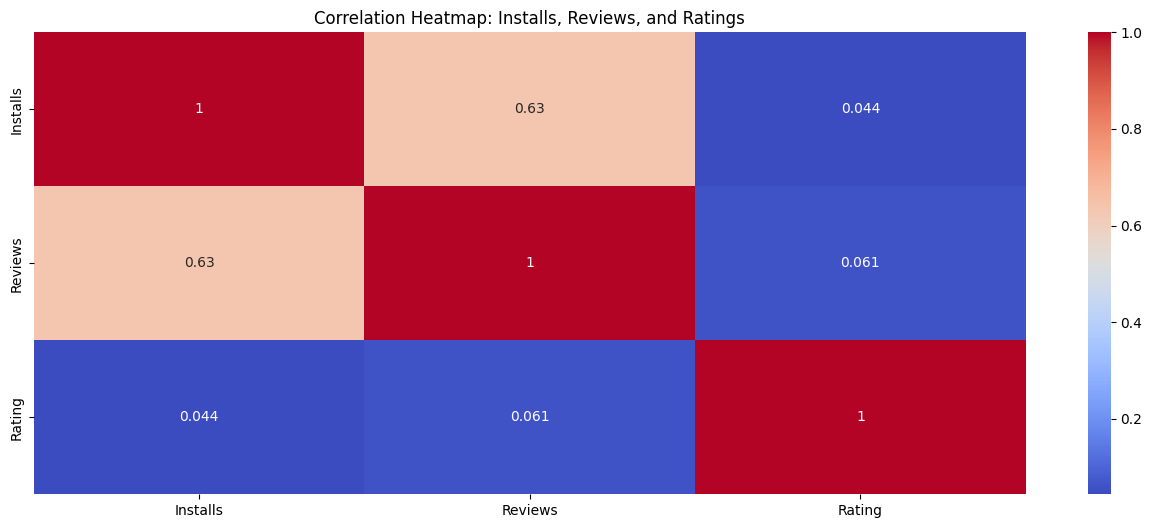

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df[['Installs', 'Reviews', 'Rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Installs, Reviews, and Ratings')
plt.show()

### Interpretation of Correlation Heatmap: ###

The heatmap shows that there is a moderate **positive correlation between Installs and Reviews (0.63)**, which means apps with more installs tend to receive more reviews. However, **Rating has a very weak correlation with both Installs (0.04) and Reviews (0.06)**, indicating that the number of installs or reviews doesn't significantly impact the app’s average rating.